In [89]:
# input and filter data
import os
import re
import pandas as pd
dft=pd.read_csv('dataset.csv')
# print(len(dft[(dft['case']=='visible')]),len(dft[dft['case']=='invisible']))
dft=dft[(dft['face']==1)&(dft['manual']!=4)]

# print(len(dft[(dft['case']=='visible')]),len(dft[dft['case']=='invisible']))
# print(len(dft[(dft['case']=='visible')&(dft['manual']==0)])/len(dft[(dft['case']=='visible')]))
# print(len(dft[(dft['case']=='visible')&(dft['manual']==1)])/len(dft[(dft['case']=='visible')]))
# print(len(dft[(dft['case']=='visible')&(dft['manual']==2)])/len(dft[(dft['case']=='visible')]))
# print(len(dft[(dft['case']=='visible')&(dft['manual']==3)])/len(dft[(dft['case']=='visible')]))

# print(len(dft[(dft['case']=='invisible')]),len(dft[dft['case']=='invisible']))
# print(len(dft[(dft['case']=='invisible')&(dft['manual']==0)])/len(dft[(dft['case']=='invisible')]))
# print(len(dft[(dft['case']=='invisible')&(dft['manual']==1)])/len(dft[(dft['case']=='invisible')]))
# print(len(dft[(dft['case']=='invisible')&(dft['manual']==2)])/len(dft[(dft['case']=='invisible')]))
# print(len(dft[(dft['case']=='invisible')&(dft['manual']==3)])/len(dft[(dft['case']=='invisible')]))

137853 139409
121683 104573
0.013724184972428359
0.5337393062301226
0.2738426896115316
0.1786938191859175
104573 104573
0.06496896904554712
0.5589301253669685
0.2918726631157182
0.08422824247176613


In [38]:
#frame level to event level¶
import pandas as pd
from itertools import groupby
manual_event_group = []

for f in dft['video'].unique():
    list_manual = dft[dft['video'] == f]['manual'].tolist()
    count_dups = [sum(1 for _ in group) for _, group in groupby(list_manual)]
    count = 1
    for cd in count_dups:
        manual_event_group.extend([count] * cd)
        count += 1

print(len(manual_event_group))
dft['event_group'] = manual_event_group

226256


In [39]:
# robot or not 
# dft['manual'] = dft['manual'].apply(lambda val: 0 if val != 1 else val)
# dft['l2cs'] = dft['l2cs'].apply(lambda val: 0 if val != 1 else val)
# dft['baseline'] = dft['baseline'].apply(lambda val: 0 if val != 1 else val)

In [40]:
#find the value have the most frequency in every group
df=dft.copy()
most_frequent_values = df.groupby(['video','event_group'])[['l2cs','baseline']].apply(lambda x: x.mode().iloc[0])
# Merge the most frequent values back to the original DataFrame
df = df.merge(most_frequent_values, on=['video','event_group'], suffixes=('', '_most_frequent'))

In [53]:
# fixed time
from sklearn.metrics import f1_score
df_l2cs_invi = pd.DataFrame()
df_l2cs = pd.DataFrame()
df_base = pd.DataFrame()
df_base_invi = pd.DataFrame()
for x in [0.1,1]: 
    l2cs_invi=[]
    l2cs_vi=[]
    baseline_vi=[]
    baseline_invi=[]
    
    df=dft.copy()
    df['event_group'] = df.groupby('video').cumcount() // (x*25) + 1
    most_frequent_values = df.groupby(['video','event_group'])[['l2cs','baseline']].apply(lambda x: x.mode().iloc[0])
    df = df.merge(most_frequent_values, on=['video','event_group'], suffixes=('', '_most'))
   
    for f in df[df['case']=='visible']['video'].unique():
        l2cs_vi.append(f1_score(df[(df['video']==f)]['manual'], df[(df['video']==f)]['baseline_most'], average='weighted'))
        baseline_vi.append(f1_score(df[(df['video']==f)]['manual'], df[(df['video']==f)]['l2cs_most'], average='weighted'))
    for f in df[df['case']=='invisible']['video'].unique():
        l2cs_invi.append(f1_score(df[(df['video']==f)]['manual'], df[(df['video']==f)]['l2cs_most'], average='weighted'))
        baseline_invi.append(f1_score(df[(df['video']==f)]['manual'], df[(df['video']==f)]['baseline_most'], average='weighted'))
    df_l2cs[x]=l2cs_vi
    df_l2cs_invi[x]=l2cs_invi
    df_base[x]=baseline_vi
    df_base_invi[x]=baseline_invi

In [57]:
print(df_l2cs[[0.1,1]].mean(),df_l2cs[[0.1,1]].std())


print(df_base[[0.1,1]].mean(),df_base[[0.1,1]].std())
print(df_l2cs_invi[[0.1,1]].mean(),df_l2cs_invi[[0.1,1]].std())
print(df_base_invi[[0.1,1]].mean(),df_base_invi[[0.1,1]].std())

0.1    0.493165
1.0    0.491779
dtype: float64 0.1    0.194960
1.0    0.199123
dtype: float64
0.1    0.493711
1.0    0.484213
dtype: float64 0.1    0.171111
1.0    0.175142
dtype: float64
0.1    0.554783
1.0    0.559729
dtype: float64 0.1    0.165627
1.0    0.187205
dtype: float64
0.1    0.514309
1.0    0.509969
dtype: float64 0.1    0.190992
1.0    0.197228
dtype: float64


In [55]:
df_l2cs_invi[[0.1,1]]

0.1m=[0.49,0.49,0.55,0.51]
1m=[0.49,0.48,0.56,0.51]
f=[0.51,0.51,0.60,0.54]

0.1s=[0.19,0.17,0.16,0.19]
1s=[0.20,0.18,0.19,0.20]
fs=[0.21,0.24,0.26,0.22]


,0.1,1.0
0,0.721956,0.721290
1,0.831328,0.853527
2,0.574439,0.577530
3,0.293160,0.208313
4,0.110493,0.034437
5,0.601955,0.624481
6,0.460494,0.476744
7,0.405041,0.386391
8,0.673142,0.732092
9,0.762615,0.800338


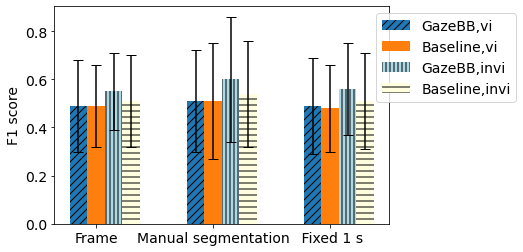

In [93]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
# Sample data for three classes and three bars in each class
class_labels = ['GazeBB,vi',  'Baseline,vi','GazeBB,invi','Baseline,invi']
bar_labels = ['Frame',  'Manual segmentation',' Fixed 1 s']
# data = np.array([[5, 8, 6], [3, 6, 4], [7, 9, 5]])
# errors = np.array([[0.5, 0.7, 0.4], [0.3, 0.4, 0.6], [49.7,50.2,54]])  # Sample error values

m01=[0.49,0.49,0.55,0.51]
m1=[0.49,0.48,0.56,0.51]
mf=[0.51,0.51,0.60,0.54]

s01=[0.19,0.17,0.16,0.19]
s1=[0.20,0.18,0.19,0.20]
sf=[0.21,0.24,0.26,0.22]


data = np.transpose(np.array([m01,mf,m1]))
errors = np.transpose(np.array([s01,sf,s1]))  # Sample error values

# Calculate the width for each bar
bar_width = 0.15

# Create the plot
fig, ax = plt.subplots()

# Loop through each class and plot the bars with error bars
for i in range(len(class_labels)):
    x = np.arange(len(bar_labels)) + i * bar_width
    if i==0:     
        ax.bar(x, data[i], width=bar_width, hatch='///', label=class_labels[i], yerr=errors[i], capsize=5)
    if i==1:
        ax.bar(x, data[i], width=bar_width, label=class_labels[i], yerr=errors[i], capsize=5)
    if i==2:
        ax.bar(x, data[i], width=bar_width, hatch='|||', label=class_labels[i], yerr=errors[i], capsize=5,color='lightblue')
    if i==3:
        ax.bar(x, data[i], width=bar_width, hatch='--', label=class_labels[i], yerr=errors[i], capsize=5,color='lightyellow')

# Set the x-axis labels and title
ax.set_xticks(np.arange(len(bar_labels)) + bar_width)
ax.set_xticklabels(bar_labels)

ax.set_ylabel('F1 score')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Add legend
# ax.legend()
# plt.ylim((0, 1))
# Show the plot
# plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import f1_score
df=dft[dft['case']=='visible'].copy()

l2cs_vi_agree=[]
l2cs_vi_left=[]
l2cs_invi_agree=[]
l2cs_invi_left=[]
baseline_vi_agree=[]
baseline_vi_left=[]
baseline_invi_agree=[]
baseline_invi_left=[]

x_list=[0.25,0.5,0.6,0.7,0.8]
# Define a custom function to replace values in each group
for x in x_list:
    def replace_values(group):
        counts = group['l2cs'].value_counts(normalize=True)
        most_frequent_value = counts.idxmax()
       # print(counts.max())
        if counts.max() > x:
            group['l2cs'] = most_frequent_value
        else:
            group['l2cs'] = 9
        return group

    # Apply the function to each group using groupby
    df_up = df.groupby((['video','event_group'])).apply(replace_values)
    d1=df_up[(df_up['l2cs']!=9)&(df_up['l2cs']==df_up['manual'])]
    d2=df_up[(df_up['l2cs']!=9)]
    f1 = f1_score(df_up[(df_up['l2cs']!=9)]['manual'], df_up[(df_up['l2cs']!=9)]['l2cs'], average='weighted')
    l2cs_vi_agree.append(f1)
    l2cs_vi_left.append(round(len(d2)/len(df_up),2))
    
    def replace_values(group):
        counts = group['baseline'].value_counts(normalize=True)
        most_frequent_value = counts.idxmax()
       # print(counts.max())
        if counts.max() > x:

            group['baseline'] = most_frequent_value
        else:
            group['baseline'] = 9
        return group

    # Apply the function to each group using groupby
    df_up = df.groupby((['video','event_group'])).apply(replace_values)
    d2=df_up[(df_up['baseline']!=9)]
    f1 = f1_score(df_up[(df_up['baseline']!=9)]['manual'], df_up[(df_up['baseline']!=9)]['baseline'], average='weighted')
    baseline_vi_agree.append(f1)
    baseline_vi_left.append(round(len(d2)/len(df_up),2))
    
    
df=dft[dft['case']=='invisible'].copy()    
for x in x_list:
    def replace_values(group):
        counts = group['l2cs'].value_counts(normalize=True)
        most_frequent_value = counts.idxmax()
       # print(counts.max())
        if counts.max() > x:

            group['l2cs'] = most_frequent_value
        else:
            group['l2cs'] = 9
        return group

    # Apply the function to each group using groupby
    df_up = df.groupby((['video','event_group'])).apply(replace_values)
    d1=df_up[(df_up['l2cs']!=9)&(df_up['l2cs']==df_up['manual'])]
    d2=df_up[(df_up['l2cs']!=9)]
    f1 = f1_score(df_up[(df_up['l2cs']!=9)]['manual'], df_up[(df_up['l2cs']!=9)]['l2cs'], average='weighted')
    l2cs_invi_agree.append(f1)
    l2cs_invi_left.append(round(len(d2)/len(df_up),2))
    def replace_values(group):
        counts = group['baseline'].value_counts(normalize=True)
        most_frequent_value = counts.idxmax()
       # print(counts.max())
        if counts.max() > x:

            group['baseline'] = most_frequent_value
        else:
            group['baseline'] = 9
        return group

    # Apply the function to each group using groupby
    df_up = df.groupby((['video','event_group'])).apply(replace_values)
    d2=df_up[(df_up['baseline']!=9)]
    f1 = f1_score(df_up[(df_up['baseline']!=9)]['manual'], df_up[(df_up['baseline']!=9)]['baseline'], average='weighted')
    baseline_invi_agree.append(f1)
    baseline_invi_left.append(round(len(d2)/len(df_up),2))
    

In [23]:
print(l2cs_vi_agree)
print(l2cs_vi_left)
print(baseline_vi_agree)
print(baseline_vi_left)
print(l2cs_invi_agree)
print(l2cs_invi_left)
print(baseline_invi_agree)
print(baseline_invi_left)

[0.7046696834790005, 0.7053202521226652, 0.7320347776383546, 0.7821121011441562, 0.8158931566699237]
[1.0, 0.99, 0.85, 0.67, 0.54]
[0.6983823432953685, 0.6993489968417719, 0.7306527168246553, 0.7833218494962694, 0.803729125366787]
[1.0, 1.0, 0.9, 0.76, 0.63]
[0.7116845308976381, 0.7131300559743219, 0.7651422742505563, 0.804856513318755, 0.8038361812540858]
[1.0, 1.0, 0.81, 0.67, 0.45]
[0.6538865706589094, 0.6559600173192693, 0.6695482987298311, 0.6757797411530273, 0.6815300947479817]
[1.0, 1.0, 0.85, 0.75, 0.64]
